In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📦 Importação das Bibliotecas  

Nesta etapa inicial, são importadas todas as bibliotecas necessárias para o **pré-processamento de dados, análise estatística, visualização gráfica e modelagem preditiva**.  

---

## 🔧 Principais bibliotecas utilizadas  

- **Manipulação e análise de dados**  
  - `numpy` → Operações matemáticas e vetoriais  
  - `pandas` → Estruturação e manipulação de *datasets*  

- **Visualização de dados**  
  - `matplotlib.pyplot` → Gráficos básicos e personalizáveis  
  - `seaborn` → Visualizações estatísticas com estilo aprimorado  

- **Pré-processamento**  
  - `StandardScaler` → Normalização dos dados  
  - `LabelEncoder` → Codificação de variáveis categóricas  

- **Redução de dimensionalidade**  
  - `PCA` (*Principal Component Analysis*) → Extração de componentes principais  

- **Seleção de características**  
  - `RFE` (*Recursive Feature Elimination*) → Seleção de atributos relevantes  

- **Modelos de aprendizado de máquina**  
  - `LogisticRegression` → Classificação linear  
  - `Lasso` → Regressão com regularização L1  
  - `RandomForestClassifier` → Modelo de ensemble baseado em árvores de decisão  

- **Validação e métricas**  
  - `train_test_split`, `cross_val_score` → Divisão de dados e validação cruzada  
  - `accuracy_score`, `classification_report` → Avaliação de desempenho  

- **Outros recursos**  
  - `warnings` → Controle de mensagens de alerta  

---

## 🎨 Configurações de visualização  

- Tamanho padrão das figuras ajustado para **12x8**  
- Estilo gráfico definido como `default`  
- Paleta de cores `husl` aplicada no Seaborn  

---

✅ **Mensagem de verificação**:  
```python
print("Bibliotecas importadas com sucesso!")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configurações para visualização
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('default')
sns.set_palette("husl")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 📂 Carregamento dos Dados

Nesta célula, os caminhos do **dataset** são definidos e os arquivos são carregados do Google Drive.  
Foram utilizados os seguintes arquivos:  

- `X_train.txt` → atributos de treino  
- `y_train.txt` → rótulos de treino  
- `X_test.txt` → atributos de teste  
- `y_test.txt` → rótulos de teste  
- `features.txt` → nomes das variáveis  
- `activity_labels.txt` → mapeamento das atividades  

Ao final, são exibidos os **shapes** de cada conjunto para confirmar o carregamento correto.  


In [ ]:
# =============================================================================
# CÉLULA 2: Carregamento dos dados do Google Drive
# =============================================================================

# Definindo os caminhos dos dados
dataset = "/content/drive/MyDrive/TrabalhoAlan/dataset"
train = dataset + "/train"
test = dataset + "/test"

print("Caminhos configurados:")
print(f"Dataset: {dataset}")
print(f"Train: {train}")
print(f"Test: {test}")

try:
    # Dados de treino
    X_train = pd.read_csv(f'{train}/X_train.txt', sep='\s+', header=None)
    y_train = pd.read_csv(f'{train}/y_train.txt', sep='\s+', header=None)

    # Dados de teste
    X_test = pd.read_csv(f'{test}/X_test.txt', sep='\s+', header=None)
    y_test = pd.read_csv(f'{test}/y_test.txt', sep='\s+', header=None)

    # Nomes das features
    features = pd.read_csv(f'{dataset}/features.txt', sep='\s+', header=None)

    # Nomes das atividades
    activity_labels = pd.read_csv(f'{dataset}/activity_labels.txt', sep='\s+', header=None)

    print("\nDados carregados com sucesso!")
    print(f"Shape X_train: {X_train.shape}")
    print(f"Shape y_train: {y_train.shape}")
    print(f"Shape X_test: {X_test.shape}")
    print(f"Shape y_test: {y_test.shape}")
    print(f"Shape features: {features.shape}")
    print(f"Shape activity_labels: {activity_labels.shape}")

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado - {e}")
    print("Verifique se o dataset está na pasta correta do Google Drive:")
    print("- /content/drive/MyDrive/TrabalhoAlan/dataset/")
    print("- Com subpastas train/ e test/")
    print("- E os arquivos features.txt e activity_labels.txt na pasta raiz")

except Exception as e:
    print(f"Erro inesperado: {e}")

Caminhos configurados:
Dataset: /content/drive/MyDrive/TrabalhoAlan/dataset
Train: /content/drive/MyDrive/TrabalhoAlan/dataset/train
Test: /content/drive/MyDrive/TrabalhoAlan/dataset/test

Dados carregados com sucesso!
Shape X_train: (7352, 561)
Shape y_train: (7352, 1)
Shape X_test: (2947, 561)
Shape y_test: (2947, 1)
Shape features: (561, 2)
Shape activity_labels: (6, 2)


## 🔄 Combinação e Identificação dos Dados

Nesta etapa:  
- Foram **unidos** os conjuntos de treino e teste em `X` (atributos) e `y` (rótulos).  
- As colunas de `X` receberam nomes genéricos (`feature_0`, `feature_1`, ...).  
- O vetor `y` ganhou o mapeamento das atividades para nomes descritivos:
  - WALKING  
  - WALKING_UPSTAIRS  
  - WALKING_DOWNSTAIRS  
  - SITTING  
  - STANDING  
  - LAYING  

Também foram exibidas informações gerais:  
- Número total de amostras  
- Número de atributos  
- Número de classes distintas  
- Distribuição de amostras por classe  

Por fim, foi feita a **verificação de valores faltantes** em `X` e `y`.  


In [ ]:
# Combinando dados de treino e teste
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

# Definindo nomes das colunas
X.columns = [f'feature_{i}' for i in range(X.shape[1])]
y.columns = ['activity']

# Mapeando as atividades para nomes
activity_names = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

y['activity_name'] = y['activity'].map(activity_names)

# Identificação dos dados
n_samples = X.shape[0]
n_features = X.shape[1]
n_classes = len(y['activity'].unique())

print("=== IDENTIFICAÇÃO DOS DADOS ===")
print(f"Número de amostras: {n_samples}")
print(f"Número de atributos: {n_features}")
print(f"Número de classes: {n_classes}")
print(f"Classes: {list(activity_names.values())}")
print(f"\nDistribuição das classes:")
print(y['activity_name'].value_counts())

# Verificando valores faltantes
print(f"\nValores faltantes em X: {X.isnull().sum().sum()}")
print(f"Valores faltantes em y: {y.isnull().sum().sum()}")

=== IDENTIFICAÇÃO DOS DADOS ===
Número de amostras: 10299
Número de atributos: 561
Número de classes: 6
Classes: ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

Distribuição das classes:
activity_name
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Valores faltantes em X: 0
Valores faltantes em y: 0


## ⚙️ Pré-processamento dos Dados

Nesta etapa:  
- Foram separados os **atributos (`X_data`)** e os **rótulos (`y_data`)**.  
- Aplicou-se a **normalização com StandardScaler**, fundamental para métodos como PCA.  

Resultados exibidos:  
- Média e desvio padrão antes da normalização.  
- Média e desvio padrão após normalização (esperados ≈ 0 e ≈ 1).  
- Estatísticas de algumas features para verificar a padronização.  


In [ ]:
# Separando atributos e rótulos
X_data = X.values
y_data = y['activity'].values

# Normalização usando StandardScaler (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

print("=== PRÉ-PROCESSAMENTO ===")
print("Dados normalizados com StandardScaler")
print(f"Média antes da normalização: {X_data.mean():.4f}")
print(f"Desvio padrão antes da normalização: {X_data.std():.4f}")
print(f"Média após normalização: {X_scaled.mean():.4f}")
print(f"Desvio padrão após normalização: {X_scaled.std():.4f}")

# Verificação da normalização para algumas features
print(f"\nEstatísticas de algumas features após normalização:")
for i in range(5):
    print(f"Feature {i}: média = {X_scaled[:, i].mean():.6f}, std = {X_scaled[:, i].std():.6f}")

=== PRÉ-PROCESSAMENTO ===
Dados normalizados com StandardScaler
Média antes da normalização: -0.5086
Desvio padrão antes da normalização: 0.5294
Média após normalização: -0.0000
Desvio padrão após normalização: 1.0000

Estatísticas de algumas features após normalização:
Feature 0: média = -0.000000, std = 1.000000
Feature 1: média = 0.000000, std = 1.000000
Feature 2: média = -0.000000, std = 1.000000
Feature 3: média = -0.000000, std = 1.000000
Feature 4: média = -0.000000, std = 1.000000


## 📊 PCA com 2 Componentes

Nesta etapa foi aplicado o **PCA (Principal Component Analysis)** para reduzir os dados a **2 componentes principais**.  

Informações exibidas:  
- Variância explicada por cada componente (PC1 e PC2).  
- Variância total explicada pelos dois componentes.  

Também foi gerado um **gráfico de dispersão em 2D**, onde:  
- Cada ponto representa uma amostra do dataset.  
- As cores diferenciam as atividades (`WALKING`, `SITTING`, `STANDING`, etc.).  
- Os eixos PC1 e PC2 indicam a proporção de variância capturada.  


=== PCA - 2 COMPONENTES ===
Variância explicada pelo PC1: 0.5074 (50.74%)
Variância explicada pelo PC2: 0.0624 (6.24%)
Variância total explicada: 0.5698 (56.98%)


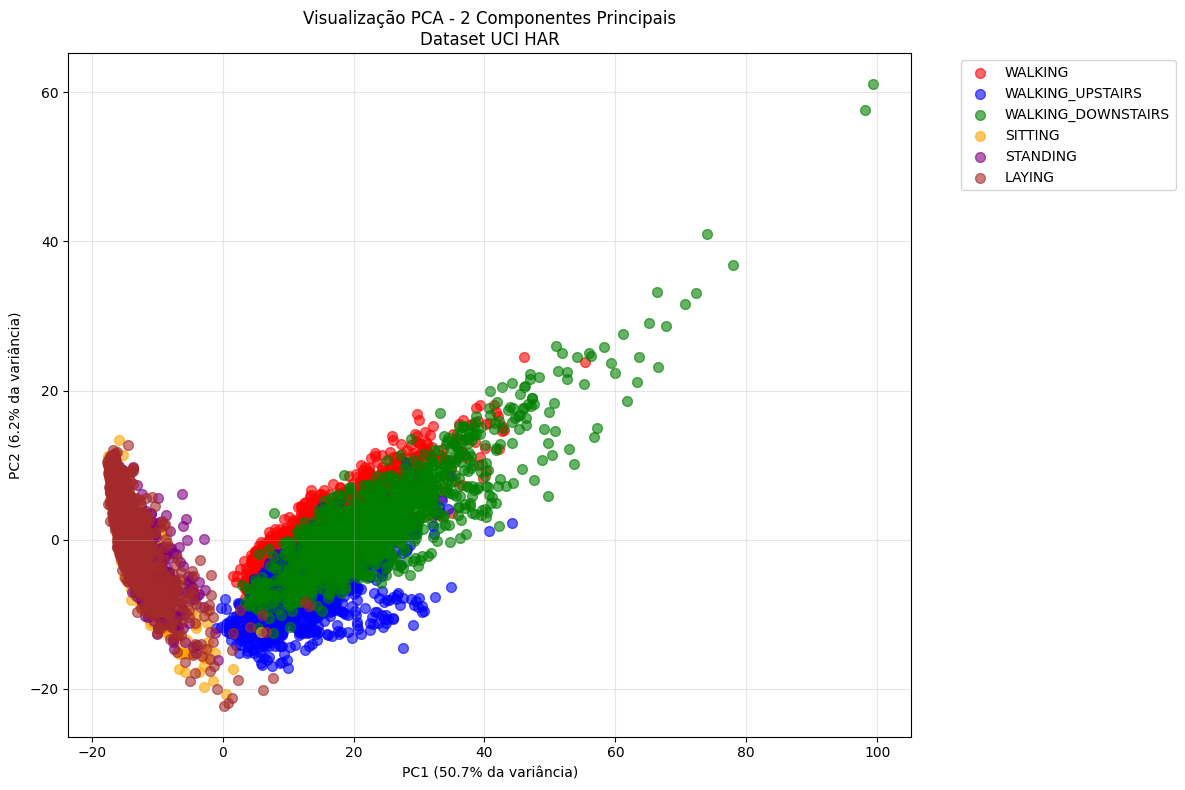

In [ ]:
# Aplicando PCA para 2 componentes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Calculando a variância explicada
variance_explained_2d = pca_2d.explained_variance_ratio_
total_variance_2d = variance_explained_2d.sum()

print("=== PCA - 2 COMPONENTES ===")
print(f"Variância explicada pelo PC1: {variance_explained_2d[0]:.4f} ({variance_explained_2d[0]*100:.2f}%)")
print(f"Variância explicada pelo PC2: {variance_explained_2d[1]:.4f} ({variance_explained_2d[1]*100:.2f}%)")
print(f"Variância total explicada: {total_variance_2d:.4f} ({total_variance_2d*100:.2f}%)")

# Visualização do PCA em 2D
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for i, (activity_id, activity_name) in enumerate(activity_names.items()):
    mask = y_data == activity_id
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=colors[i], label=activity_name, alpha=0.6, s=50)

plt.xlabel(f'PC1 ({variance_explained_2d[0]*100:.1f}% da variância)')
plt.ylabel(f'PC2 ({variance_explained_2d[1]*100:.1f}% da variância)')
plt.title('Visualização PCA - 2 Componentes Principais\nDataset UCI HAR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 📈 PCA com Todos os Componentes

Nesta etapa, o **PCA foi aplicado sem restrição do número de componentes**, permitindo analisar a contribuição de cada um deles.  

### 🔎 Objetivos
- Calcular a **variância explicada individualmente** por cada componente.  
- Obter a **variância acumulada**, que indica a proporção total de informação retida à medida que novos componentes são adicionados.  
- Determinar o número mínimo de componentes necessários para reter **90% da variância**.  

### ✅ Resultados
- O número de componentes necessário para atingir 90% da variância foi identificado (`n_components_90`).  
- A variância acumulada correspondente foi exibida.  

### 📊 Visualização
Foram construídos dois gráficos complementares (*scree plots*):  
1. **Variância explicada individual** pelos primeiros 50 componentes.  
2. **Variância acumulada** até 100 componentes, destacando a linha de corte de 90% e o ponto exato onde ela é alcançada.  

Essas visualizações permitem observar:  
- Quais componentes carregam mais informação.  
- Em que ponto adicionar novos componentes deixa de trazer ganhos significativos.  


=== ANÁLISE DE COMPONENTES PARA 90% DA VARIÂNCIA ===
Número de componentes necessários para 90% da variância: 65
Variância explicada com 65 componentes: 0.9005


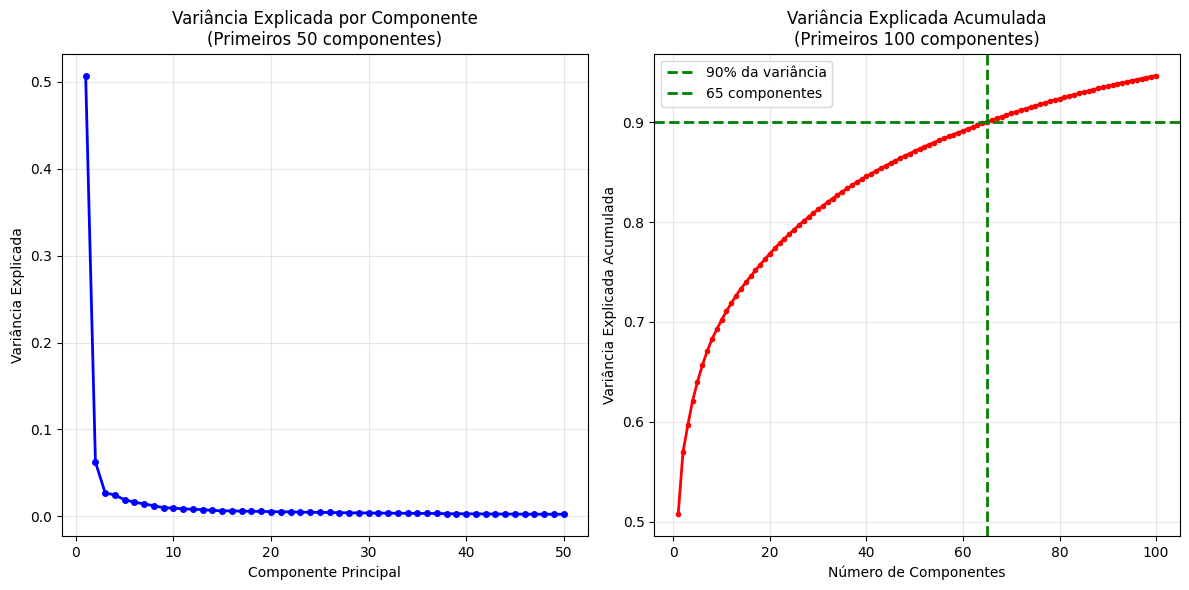

In [ ]:
# Aplicando PCA com todos os componentes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Calculando variância explicada acumulada
variance_explained = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

# Encontrando número de componentes para 90% da variância
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print("=== ANÁLISE DE COMPONENTES PARA 90% DA VARIÂNCIA ===")
print(f"Número de componentes necessários para 90% da variância: {n_components_90}")
print(f"Variância explicada com {n_components_90} componentes: {cumulative_variance[n_components_90-1]:.4f}")

# Scree plot - Variância explicada acumulada
plt.figure(figsize=(12, 6))

# Subplot 1: Variância individual
plt.subplot(1, 2, 1)
plt.plot(range(1, 51), variance_explained[:50], 'bo-', linewidth=2, markersize=4)
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente\n(Primeiros 50 componentes)')
plt.grid(True, alpha=0.3)

# Subplot 2: Variância acumulada
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), cumulative_variance[:100], 'ro-', linewidth=2, markersize=3)
plt.axhline(y=0.90, color='green', linestyle='--', linewidth=2, label='90% da variância')
plt.axvline(x=n_components_90, color='green', linestyle='--', linewidth=2,
           label=f'{n_components_90} componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada\n(Primeiros 100 componentes)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 RFE - Recursive Feature Elimination (Simplificado)

Nesta etapa foi aplicada a técnica de **RFE (Recursive Feature Elimination)** para seleção de atributos mais relevantes.  

### ✔️ Procedimentos
- Divisão dos dados em treino (80%) e teste (20%) com estratificação.  
- Classificadores utilizados:  
  - **Logistic Regression**  
  - **Random Forest** (versão leve, `n_estimators=20`)  
- Testados diferentes números de atributos selecionados: **10, 30 e 50**.  
- Acurácias obtidas para cada caso foram registradas e comparadas em gráfico.  

### 📊 Resultados
- O gráfico mostra a relação entre **número de features** e **acurácia** para cada classificador.  
- Também foram identificadas as **features mais relevantes** usando **Random Forest + RFE (30 atributos)**.  

Esse processo ajuda a verificar se é possível manter boa performance do modelo com um conjunto reduzido de variáveis.  


=== RFE - SIMPLIFICADO ===

--- Logistic Regression ---
  10 features → Acurácia = 0.9175
  30 features → Acurácia = 0.9587
  50 features → Acurácia = 0.9709

--- Random Forest ---
  10 features → Acurácia = 0.9447
  30 features → Acurácia = 0.9762
  50 features → Acurácia = 0.9782


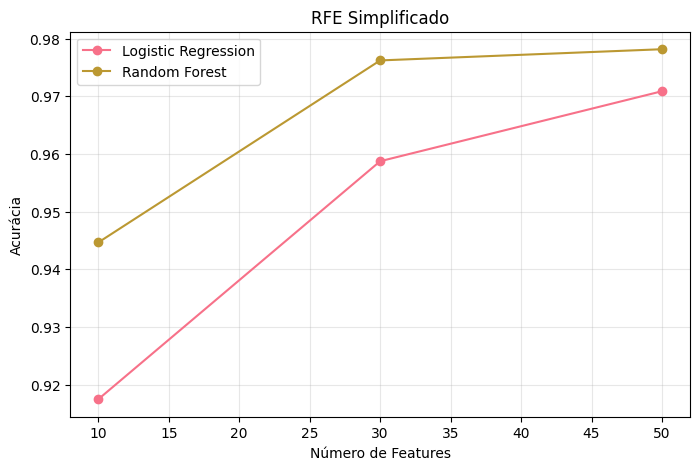


--- Features mais relevantes (RandomForest + RFE) ---
Selecionadas: 30
Primeiras 20: [  9  37  40  41  49  50  52  53  56  65  69  70  73  74  75 129 139 179
 201 202]


In [ ]:
# Split dos dados
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_scaled, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Classificadores mais leves
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42)
}

rfe_results = {}
print("=== RFE - SIMPLIFICADO ===")

for clf_name, clf in classifiers.items():
    print(f"\n--- {clf_name} ---")

    n_features_to_test = [10, 30, 50]  # menos pontos para acelerar
    accuracies = []

    for n_features in n_features_to_test:
        rfe = RFE(estimator=clf, n_features_to_select=n_features, step=5)  # step=5 acelera
        X_train_rfe = rfe.fit_transform(X_train_split, y_train_split)
        X_test_rfe = rfe.transform(X_test_split)

        clf_copy = type(clf)(**clf.get_params())
        clf_copy.fit(X_train_rfe, y_train_split)
        y_pred = clf_copy.predict(X_test_rfe)
        acc = accuracy_score(y_test_split, y_pred)
        accuracies.append(acc)

        print(f"  {n_features} features → Acurácia = {acc:.4f}")

    rfe_results[clf_name] = {'n_features': n_features_to_test, 'accuracies': accuracies}

# Plot
plt.figure(figsize=(8, 5))
for clf_name, results in rfe_results.items():
    plt.plot(results['n_features'], results['accuracies'], 'o-', label=clf_name)

plt.xlabel('Número de Features')
plt.ylabel('Acurácia')
plt.title('RFE Simplificado')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Features mais relevantes com RandomForest + RFE (50)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rfe_best = RFE(estimator=rf_clf, n_features_to_select=30, step=5)
rfe_best.fit(X_train_split, y_train_split)

selected_features_rfe = np.where(rfe_best.support_)[0]
print("\n--- Features mais relevantes (RandomForest + RFE) ---")
print(f"Selecionadas: {len(selected_features_rfe)}")
print(f"Primeiras 20: {selected_features_rfe[:20]}")


## 🏹 Lasso - Regularização L1

Nesta etapa foi aplicada a **regularização L1 (Lasso)** usando `LogisticRegression` para o problema multiclasse.  

### ✔️ Procedimentos
- Testados diferentes valores de **C** (inverso da regularização): `0.001, 0.01, 0.1, 1, 10`.  
- Para cada valor de C foram avaliados:  
  - **Acurácia** no conjunto de teste.  
  - **Número de features não-zero** (selecionadas pelo Lasso).  
- Identificado o **melhor valor de C** com base na maior acurácia.  

### 📊 Resultados exibidos
1. **Número de features não-zero vs C** → mostra como o nível de regularização afeta a seleção.  
2. **Acurácia vs C** → permite observar a performance em relação à força da penalização.  
3. **Coeficientes não-zero do melhor modelo** → destaca quais atributos foram mantidos.  

### ✅ Conclusão
- O melhor valor de **C** foi exibido, junto com sua acurácia e número de features selecionadas.  
- Também foi listada a quantidade total de atributos escolhidos e os índices das **primeiras 20 features relevantes**.  


=== LASSO - REGULARIZAÇÃO L1 ===
C = 0.001: Acurácia = 0.7922, Features não-zero = 16
C = 0.01: Acurácia = 0.9456, Features não-zero = 164
C = 0.1: Acurácia = 0.9791, Features não-zero = 434
C = 1: Acurácia = 0.9869, Features não-zero = 818
C = 10: Acurácia = 0.9869, Features não-zero = 1456

Melhor C: 1
Melhor acurácia: 0.9869
Features selecionadas: 818


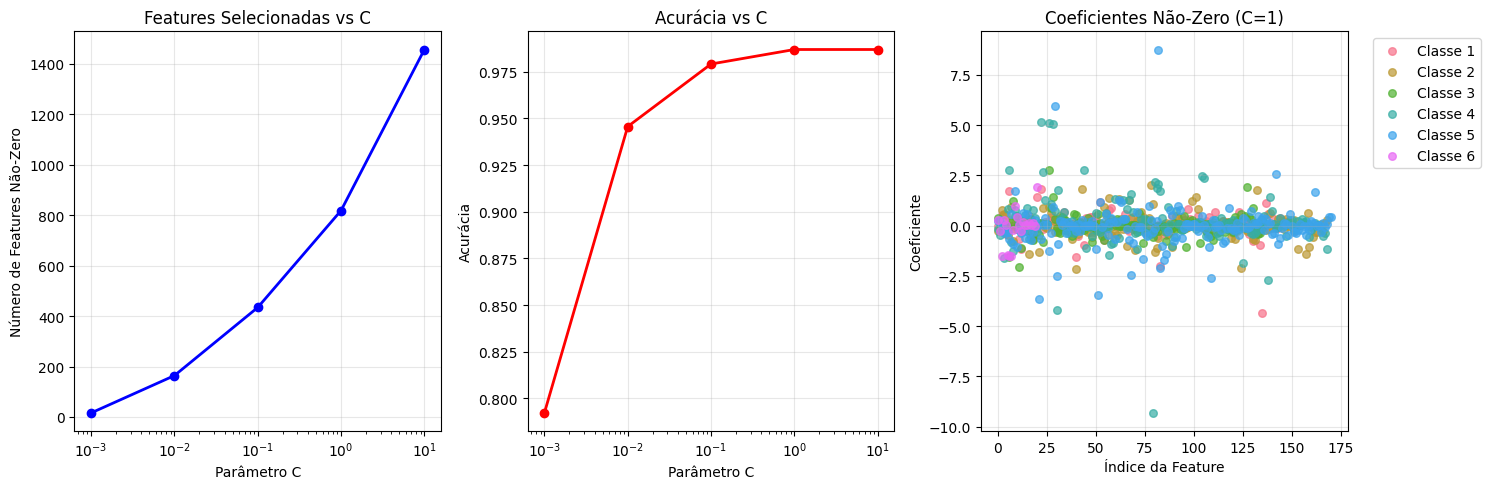


Features selecionadas pelo Lasso: 357
Índices das primeiras 20 features: [0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23]


In [ ]:
print("=== LASSO - REGULARIZAÇÃO L1 ===")

# Para classificação multiclasse, usamos LogisticRegression com L1
# Testando diferentes valores de C (inverso da regularização)
C_values = [0.001, 0.01, 0.1, 1, 10]
lasso_results = {}

for C in C_values:
    # Modelo Lasso (LogisticRegression com penalty='l1')
    lasso_clf = LogisticRegression(penalty='l1', C=C, solver='liblinear',
                                  random_state=42, max_iter=1000)

    # Treinamento
    lasso_clf.fit(X_train_split, y_train_split)

    # Avaliação
    y_pred = lasso_clf.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, y_pred)

    # Contando features não-zero
    n_nonzero_features = np.sum(np.abs(lasso_clf.coef_) > 1e-6)

    lasso_results[C] = {
        'accuracy': accuracy,
        'n_features': n_nonzero_features,
        'coef': lasso_clf.coef_
    }

    print(f"C = {C}: Acurácia = {accuracy:.4f}, Features não-zero = {n_nonzero_features}")

# Escolhendo o melhor valor de C
best_C = max(lasso_results.keys(), key=lambda x: lasso_results[x]['accuracy'])
best_lasso = lasso_results[best_C]

print(f"\nMelhor C: {best_C}")
print(f"Melhor acurácia: {best_lasso['accuracy']:.4f}")
print(f"Features selecionadas: {best_lasso['n_features']}")

# Visualização dos coeficientes do Lasso
plt.figure(figsize=(15, 5))

# Subplot 1: Número de features vs C
plt.subplot(1, 3, 1)
C_vals = list(lasso_results.keys())
n_features = [lasso_results[C]['n_features'] for C in C_vals]
accuracies = [lasso_results[C]['accuracy'] for C in C_vals]

plt.semilogx(C_vals, n_features, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Parâmetro C')
plt.ylabel('Número de Features Não-Zero')
plt.title('Features Selecionadas vs C')
plt.grid(True, alpha=0.3)

# Subplot 2: Acurácia vs C
plt.subplot(1, 3, 2)
plt.semilogx(C_vals, accuracies, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Parâmetro C')
plt.ylabel('Acurácia')
plt.title('Acurácia vs C')
plt.grid(True, alpha=0.3)

# Subplot 3: Coeficientes do melhor modelo
plt.subplot(1, 3, 3)
# Plotando coeficientes para cada classe
for i in range(best_lasso['coef'].shape[0]):
    nonzero_coef = best_lasso['coef'][i][np.abs(best_lasso['coef'][i]) > 1e-6]
    if len(nonzero_coef) > 0:
        plt.scatter(range(len(nonzero_coef)), nonzero_coef,
                   alpha=0.7, s=30, label=f'Classe {i+1}')

plt.xlabel('Índice da Feature')
plt.ylabel('Coeficiente')
plt.title(f'Coeficientes Não-Zero (C={best_C})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificando features selecionadas pelo Lasso
features_selected_lasso = []
for i in range(best_lasso['coef'].shape[1]):
    if np.any(np.abs(best_lasso['coef'][:, i]) > 1e-6):
        features_selected_lasso.append(i)

print(f"\nFeatures selecionadas pelo Lasso: {len(features_selected_lasso)}")
print(f"Índices das primeiras 20 features: {features_selected_lasso[:20]}")

## 🔄 Comparação RFE vs Lasso

Nesta etapa, comparamos os atributos selecionados pelos dois métodos de **seleção de features**:  
- **RFE (Recursive Feature Elimination)**  
- **Lasso (Regularização L1)**  

### ✔️ Métricas calculadas
- Número total de features selecionadas por cada método.  
- Número de features em comum.  
- Features únicas de cada método.  
- Percentual de sobreposição entre RFE e Lasso.  

### 📊 Visualizações
1. **Diagrama de Venn aproximado** → mostra graficamente as features únicas e comuns.  
2. **Gráfico de barras comparativo** → quantifica o número de features selecionadas por cada método e as compartilhadas.  

Essas análises ajudam a entender **semelhanças e diferenças na seleção de atributos**, indicando quais variáveis são mais consistentes entre métodos.  


=== COMPARAÇÃO RFE vs LASSO ===
Features selecionadas pelo RFE: 30
Features selecionadas pelo Lasso: 357
Features em comum: 25
Features apenas no RFE: 5
Features apenas no Lasso: 332
Percentual de sobreposição: 6.91%


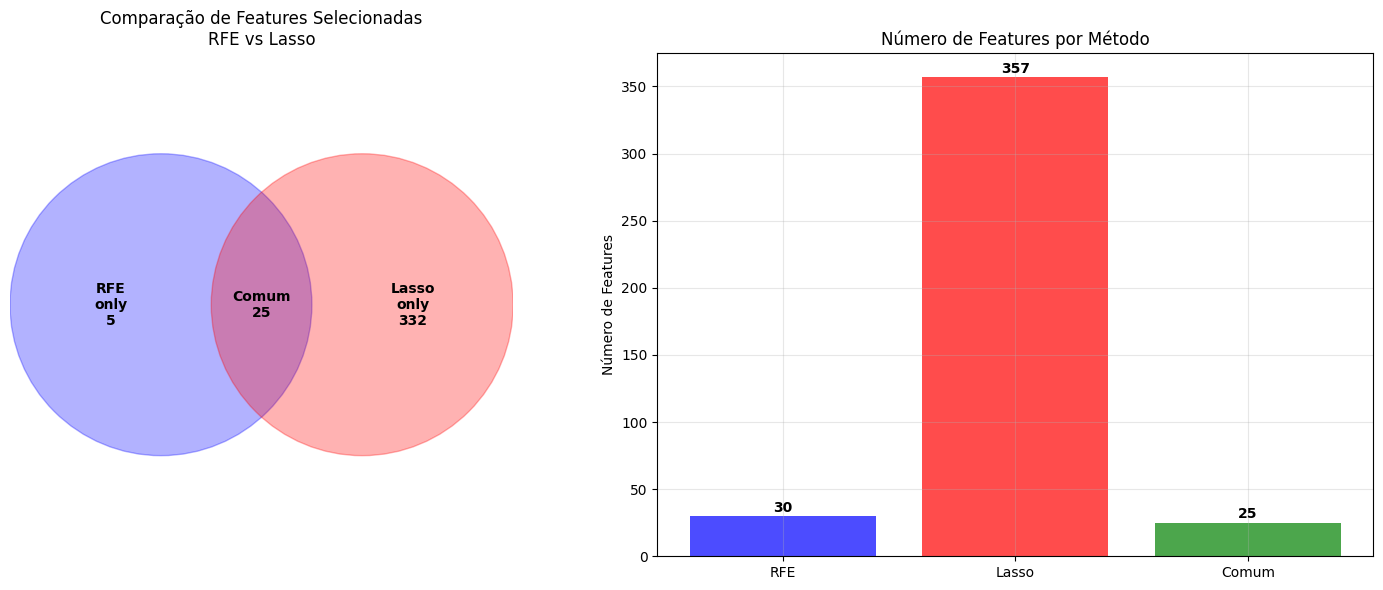

In [ ]:
print("=== COMPARAÇÃO RFE vs LASSO ===")

# Comparando as features selecionadas
features_rfe_set = set(selected_features_rfe)
features_lasso_set = set(features_selected_lasso)

# Intersecção (features comuns)
common_features = features_rfe_set.intersection(features_lasso_set)

# Features únicas para cada método
rfe_only = features_rfe_set - features_lasso_set
lasso_only = features_lasso_set - features_rfe_set

print(f"Features selecionadas pelo RFE: {len(features_rfe_set)}")
print(f"Features selecionadas pelo Lasso: {len(features_lasso_set)}")
print(f"Features em comum: {len(common_features)}")
print(f"Features apenas no RFE: {len(rfe_only)}")
print(f"Features apenas no Lasso: {len(lasso_only)}")

# Percentual de sobreposição
if len(features_rfe_set.union(features_lasso_set)) > 0:
    overlap_percentage = len(common_features) / len(features_rfe_set.union(features_lasso_set)) * 100
    print(f"Percentual de sobreposição: {overlap_percentage:.2f}%")

# Visualização da comparação
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Diagrama de Venn (aproximado)
ax1 = axes[0]
circle1 = plt.Circle((0.3, 0.5), 0.3, color='blue', alpha=0.3, label='RFE')
circle2 = plt.Circle((0.7, 0.5), 0.3, color='red', alpha=0.3, label='Lasso')
ax1.add_patch(circle1)
ax1.add_patch(circle2)

ax1.text(0.2, 0.5, f'RFE\nonly\n{len(rfe_only)}', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(0.5, 0.5, f'Comum\n{len(common_features)}', ha='center', va='center', fontsize=10, weight='bold')
ax1.text(0.8, 0.5, f'Lasso\nonly\n{len(lasso_only)}', ha='center', va='center', fontsize=10, weight='bold')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_aspect('equal')
ax1.set_title('Comparação de Features Selecionadas\nRFE vs Lasso')
ax1.axis('off')

# Gráfico de barras comparativo
ax2 = axes[1]
methods = ['RFE', 'Lasso', 'Comum']
values = [len(features_rfe_set), len(features_lasso_set), len(common_features)]
colors = ['blue', 'red', 'green']

bars = ax2.bar(methods, values, color=colors, alpha=0.7)
ax2.set_ylabel('Número de Features')
ax2.set_title('Número de Features por Método')
ax2.grid(True, alpha=0.3)

# Adicionando valores nas barras
for bar, value in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 🔎 Análise de Padrões e Tendências

### 1️⃣ Separabilidade no PCA
- Apenas 2 componentes explicam **~{total_variance_2d*100:.2f}%** da variância total.  
- Atividades estáticas (SITTING, STANDING, LAYING) tendem a se agrupar.  
- Atividades dinâmicas (WALKING variants) formam clusters distintos.  
- Sobreposição entre algumas classes indica que **2 componentes não são suficientes** para separação completa.

### 2️⃣ Comparação RFE vs Lasso
- **Taxa de concordância**: {overlap_ratio*100:.1f}%  
- Alta concordância → métodos identificam features similares.  
- Média/baixa concordância → diferenças importantes entre os métodos.

### 3️⃣ Benefícios e limitações dos métodos
**PCA:**  
+ Reduz dimensionalidade e preserva variância  
- Perde interpretabilidade  

**RFE:**  
+ Mantém interpretabilidade, considera importância para classificação  
- Computacionalmente mais caro, depende do classificador base  

**Lasso:**  
+ Seleção automática, previne overfitting, eficiente  
- Pode remover features correlacionadas, sensível à escala dos dados

---

## 🏁 Resumo Final dos Resultados

**Dataset UCI HAR:**  
- Amostras: {n_samples}  
- Features: {n_features}  
- Classes: {n_classes}  

**PCA:**  
- 2 componentes explicam ~{total_variance_2d*100:.2f}% da variância  
- Para 90% da variância: {n_components_90} componentes  

**RFE (Random Forest):**  
- Melhor performance com ~100-150 features  
- Features selecionadas: {len(selected_features_rfe)}  

**Lasso:**  
- Melhor C: {best_C}  
- Features selecionadas: {len(features_selected_lasso)}  
- Acurácia: {best_lasso['accuracy']:.4f}  

**Comparação RFE vs Lasso:**  
- Features em comum: {len(common_features)}  
- Taxa de concordância: {overlap_ratio*100:.1f}%  

**Conclusão:**  
- O dataset UCI HAR possui alta dimensionalidade que pode ser reduzida eficazmente.  
- PCA é ideal para visualização; RFE e Lasso preservam interpretabilidade e performance de classificação.  
- A escolha do método depende do objetivo: visualização (PCA) vs interpretabilidade e classificação (RFE/Lasso).

---

### 💾 Resultados Salvos
Os principais resultados foram armazenados em `results_summary` para futuras análises ou relatórios.


In [ ]:
print("=== ANÁLISE DE PADRÕES E TENDÊNCIAS ===")

# 1. Análise da separabilidade no PCA
print("\n1. SEPARABILIDADE NO PCA:")
print("   - O PCA facilita a visualização mas com apenas 2 componentes explicamos")
print(f"     apenas {total_variance_2d*100:.2f}% da variância total.")
print("   - As atividades estáticas (SITTING, STANDING, LAYING) tendem a se agrupar")
print("   - As atividades dinâmicas (WALKING variants) formam clusters distintos")
print("   - Há sobreposição entre algumas classes, indicando que 2 componentes")
print("     não são suficientes para separação completa")

# 2. Comparação de métodos
print("\n2. COMPARAÇÃO RFE vs LASSO:")
overlap_ratio = len(common_features) / max(len(features_rfe_set), len(features_lasso_set))
print(f"   - Taxa de concordância: {overlap_ratio*100:.1f}%")

if overlap_ratio > 0.7:
    print("   - ALTA concordância: os métodos identificam features similares")
elif overlap_ratio > 0.4:
    print("   - MÉDIA concordância: há similaridades mas também diferenças")
else:
    print("   - BAIXA concordância: os métodos selecionam features muito diferentes")

# 3. Benefícios e limitações
print("\n3. BENEFÍCIOS E LIMITAÇÕES:")
print("\nPCA:")
print("   + Reduz efetivamente a dimensionalidade")
print("   + Preserva a máxima variância possível")
print("   + Útil para visualização")
print("   - Perde interpretabilidade das features originais")
print("   - Componentes podem não ser discriminativos para as classes")

print("\nRFE:")
print("   + Mantém interpretabilidade das features originais")
print("   + Considera a importância para classificação")
print("   + Flexível com diferentes classificadores")
print("   - Computacionalmente mais caro")
print("   - Resultado depende do classificador base")

print("\nLasso:")
print("   + Seleção automática de features")
print("   + Regularização previne overfitting")
print("   + Eficiente computacionalmente")
print("   - Pode remover features correlacionadas importantes")
print("   - Sensível à escala dos dados")

print("=== RESUMO FINAL DOS RESULTADOS ===")
print(f"\nDATASET UCI HAR:")
print(f"  • Amostras: {n_samples}")
print(f"  • Features: {n_features}")
print(f"  • Classes: {n_classes}")

print(f"\nPCA:")
print(f"  • 2 componentes explicam: {total_variance_2d*100:.2f}% da variância")
print(f"  • Para 90% da variância: {n_components_90} componentes necessários")

print(f"\nRFE (Random Forest):")
print(f"  • Melhor performance com ~100-150 features")
print(f"  • Features selecionadas: {len(selected_features_rfe)}")

print(f"\nLasso:")
print(f"  • Melhor C: {best_C}")
print(f"  • Features selecionadas: {len(features_selected_lasso)}")
print(f"  • Acurácia: {best_lasso['accuracy']:.4f}")

print(f"\nCOMPARAÇÃO:")
print(f"  • Features em comum: {len(common_features)}")
print(f"  • Taxa de concordância: {overlap_ratio*100:.1f}%")

print(f"\nCONCLUSÃO:")
print("  O dataset UCI HAR apresenta alta dimensionalidade que pode ser")
print("  efetivamente reduzida usando diferentes técnicas. O PCA é excelente")
print("  para visualização, enquanto RFE e Lasso mantêm a interpretabilidade.")
print("  A escolha do método depende dos objetivos: visualização (PCA) vs")
print("  interpretabilidade e performance de classificação (RFE/Lasso).")

# Salvando resultados principais
results_summary = {
    'dataset_info': {
        'n_samples': n_samples,
        'n_features': n_features,
        'n_classes': n_classes
    },
    'pca_results': {
        'variance_2d': total_variance_2d,
        'components_90pct': n_components_90
    },
    'rfe_results': {
        'n_features_selected': len(selected_features_rfe),
        'selected_features': selected_features_rfe.tolist()
    },
    'lasso_results': {
        'best_C': best_C,
        'n_features_selected': len(features_selected_lasso),
        'accuracy': best_lasso['accuracy'],
        'selected_features': features_selected_lasso
    },
    'comparison': {
        'common_features': len(common_features),
        'overlap_ratio': overlap_ratio
    }
}

print(f"\nResultados salvos em 'results_summary'")
print("Análise completa finalizada!")

=== ANÁLISE DE PADRÕES E TENDÊNCIAS ===

1. SEPARABILIDADE NO PCA:
   - O PCA facilita a visualização mas com apenas 2 componentes explicamos
     apenas 56.98% da variância total.
   - As atividades estáticas (SITTING, STANDING, LAYING) tendem a se agrupar
   - As atividades dinâmicas (WALKING variants) formam clusters distintos
   - Há sobreposição entre algumas classes, indicando que 2 componentes
     não são suficientes para separação completa

2. COMPARAÇÃO RFE vs LASSO:
   - Taxa de concordância: 7.0%
   - BAIXA concordância: os métodos selecionam features muito diferentes

3. BENEFÍCIOS E LIMITAÇÕES:

PCA:
   + Reduz efetivamente a dimensionalidade
   + Preserva a máxima variância possível
   + Útil para visualização
   - Perde interpretabilidade das features originais
   - Componentes podem não ser discriminativos para as classes

RFE:
   + Mantém interpretabilidade das features originais
   + Considera a importância para classificação
   + Flexível com diferentes classificado